# 1. Prepare Problem

#### a) Load libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

import warnings

warnings.filterwarnings(action='ignore')



#### b) Load dataset

In [25]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4551  100  4551    0     0   5710      0 --:--:-- --:--:-- --:--:--  5710


In [26]:
iris=pd.read_csv('iris.data',header=None)
iris.rename(columns={0:"sepal_length",1:"sepal_width",2:"petal_length",3:"petal_width",4:"class"},inplace=True)
print('Shape of Data :', iris.shape)
iris.head()

Shape of Data : (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Summarize Data
#### a) Descriptive statistics


In [27]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
pd.value_counts(iris['class'])

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

#### b) Data visualizations

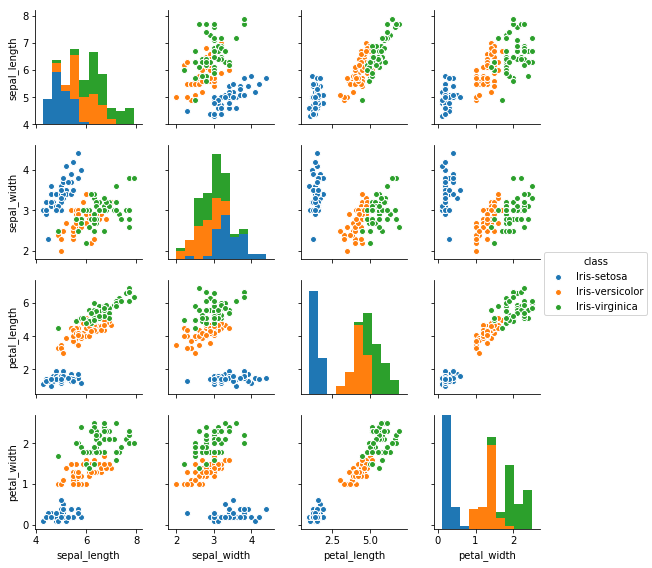

In [29]:
#Scatterplots
sns.pairplot(data=iris,hue='class',size=2)

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

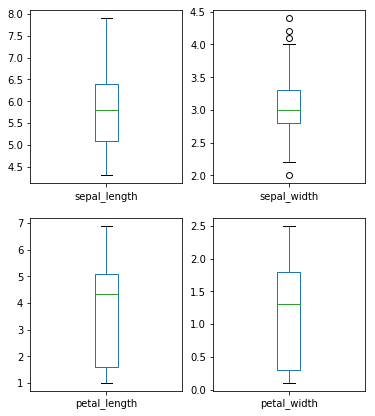

In [30]:
#Univariate plots to identify oultier
iris.plot(kind='box',subplots=True,sharex=False, sharey=False,layout=(2,2),figsize=(6,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002117B4F46D8>,
      dtype=object)

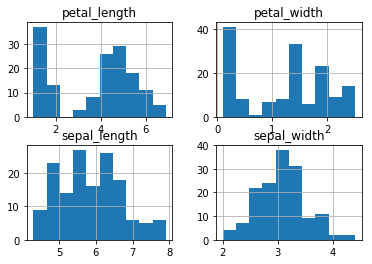

In [31]:
#histograms
iris.hist()

# 3. Prepare Data
#### a) Data Cleaning - Data is clean
#### b) Feature Selection - All fields are significant
#### c) Data Transforms - No transformation done

# 4. Evaluate Algorithms
#### a) Split-out validation dataset
#### b) Test options and evaluation metric


In [32]:
x_iris=iris.iloc[:,:4]
print(x_iris.shape)
x_iris.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y_iris=iris['class']
print(y_iris.shape)
y_iris.head()

(150,)


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [34]:
validation_size=0.2
seed=10
x_train, x_test, y_train, y_test=train_test_split(x_iris,y_iris,test_size=validation_size,random_state=seed)

In [35]:
# c) Spot Check Algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [36]:
#evaluate each model
results=[]
names=[]

In [37]:
for name, model in models:
    kfold=KFold(n_splits=10,random_state=seed)
    cv_results=cross_val_score(model,x_train,y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

LR: 0.941667 (0.098953)
LDA: 0.975000 (0.053359)
KNN: 0.958333 (0.055902)
CART: 0.933333 (0.062361)
NB: 0.925000 (0.078617)
SVM: 0.975000 (0.038188)


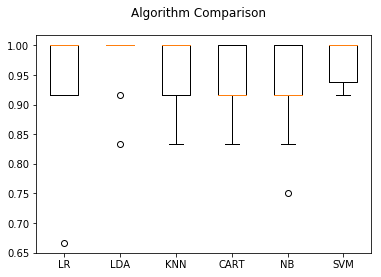

In [38]:
# d) Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [39]:
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

In [40]:
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset

In [41]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

      micro avg       0.97      0.97      0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]


In [42]:
svm=SVC()
svm.fit(x_train,y_train)
predictions=svm.predict(x_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
